<a href="https://colab.research.google.com/github/ravising-h/One-Fourth-Labs/blob/master/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I am working on Internship Task of One Fourth Labs. I am provided with Extended MNIST Dataset. This is First Task's Notebook.



## Task 2: Vowel/Consonant and Even/Odd Classifier (Moderate)
Given an image, you are supposed to design model(s) which does the following:

If the image is a letter, you are supposed to predict if it is a vowel or consonant.
If the image is a digit, you are supposed to predict if it is an even or odd number.
You are supposed to use only ML models that directly predicts the above, instead of doing manual predictions like using modulus operator on top of digit predictions.

***Expected outcome:*** Given an image, your end-to-end setup must print whether it is a letter or digit, and based on that, it must automatically run the corresponding model to print if it is vowel/consonant or even/odd respectively.

In [1]:
## IMAGE PROCESSING
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # Plotting Graphsand Image
from math import floor # Round OFF
import seaborn as sns # Plotting
import base64 # CODING
from bokeh.plotting import figure
from bokeh.io import show, output_notebook

## UTILS
import random # generating Random Number
import warnings # Removing Warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.image import ImageDataGenerator # Data Augumentation
from tqdm import tqdm # ProgressBar
from IPython.display import HTML # Dataset Download

## MODELS
from keras.layers import Input,Conv2D,Dense, Dropout, BatchNormalization, MaxPool2D, Activation, Flatten, AvgPool2D,GlobalMaxPooling2D # KERAS LAYERS
from keras.layers import  BatchNormalization as btn # BatchNormalization
from keras.regularizers import l2
from keras.models import Model, Sequential  #model
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
!nvidia-smi

Sun Nov 17 12:30:47 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   28C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# Input data files are available in the  directory.
import os
print("Files in the Dataset:-")
for dirname, _, filenames in os.walk("/content/drive/My Drive/Character + Digits data"):
    for filename in filenames:
        print( os.path.join(dirname, filename))

Files in the Dataset:-
/content/drive/My Drive/Character + Digits data/characters-digits-mapping.txt
/content/drive/My Drive/Character + Digits data/Readme.txt
/content/drive/My Drive/Character + Digits data/characters-digits-test.csv
/content/drive/My Drive/Character + Digits data/characters-digits-train.csv
/content/drive/My Drive/Character + Digits data/utils.py
/content/drive/My Drive/Character + Digits data/Model_0_V1.h5
/content/drive/My Drive/Character + Digits data/build_model.py
/content/drive/My Drive/Character + Digits data/model_0_V2.h5
/content/drive/My Drive/Character + Digits data/model_0_V1.h5
/content/drive/My Drive/Character + Digits data/TrainingBasicModel.ipynb
/content/drive/My Drive/Character + Digits data/result_Task1.csv
/content/drive/My Drive/Character + Digits data/Task1.ipynb
/content/drive/My Drive/Character + Digits data/Task3.ipynb
/content/drive/My Drive/Character + Digits data/Task2.ipynb
/content/drive/My Drive/Character + Digits data/__pycache__/utils

In [5]:
%cd /content/drive/My Drive/Character + Digits data/

/content/drive/My Drive/Character + Digits data


In [0]:
from utils import *

In [0]:
train_csv = pd.read_csv('characters-digits-train.csv',header=None)
test_csv = pd.read_csv('characters-digits-test.csv',header=None)

In [8]:
train_csv.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


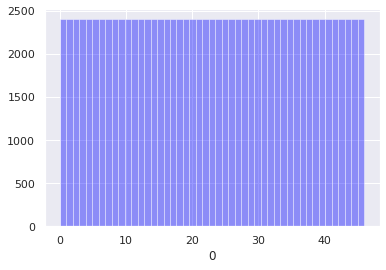

In [9]:
sns.set(color_codes=True)
sns.distplot(train_csv.iloc[:,0],label = 'LABELS',kde=False
             ,color='blue',norm_hist=False);

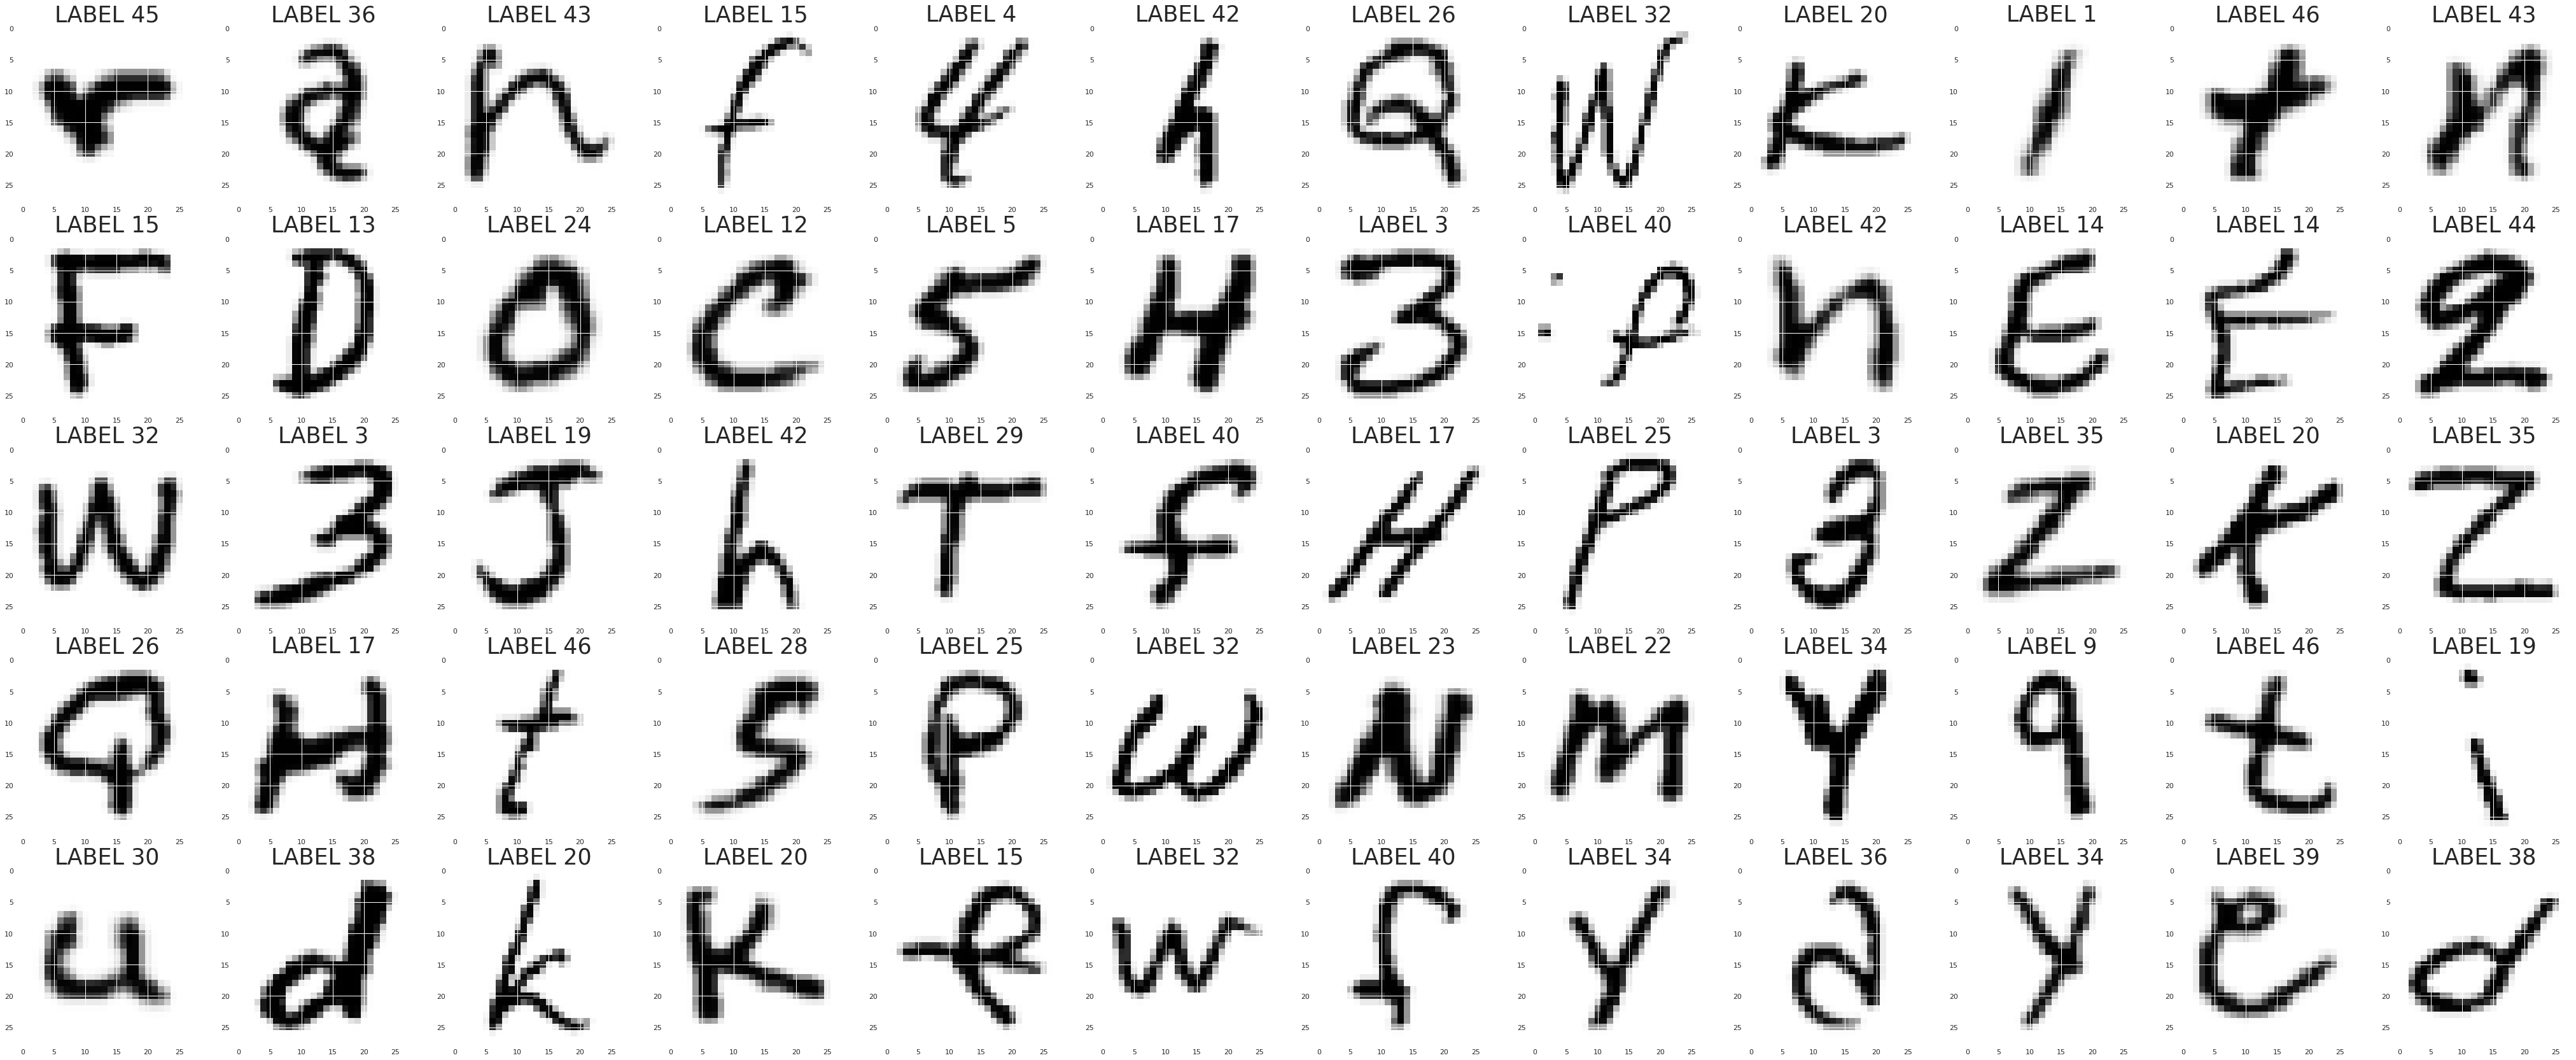

In [10]:
size_of_img = (int(np.sqrt(train_csv.shape[1])),int(np.sqrt(train_csv.shape[1])))
fig=plt.figure(figsize=(72,72))
for i in range(60):
    ax=fig.add_subplot(12,12,i+1)
    plot_image = np.array(train_csv.iloc[i,1:]).reshape(size_of_img)
    ax.imshow(np.fliplr(np.rot90(plot_image,3)),cmap='Greys')
    ax.set_title('LABEL ' + str(train_csv.iloc[i,0]),fontsize= 35)
plt.show()

In [11]:
train_feature, train_labels, dev_feature, dev_labels,_,__ = dataset_distribution(train_csv,[80,20,0]) ### IT GIVES NORMALIZE DATA.
train_feature.shape, train_labels.shape, dev_feature.shape, dev_labels.shape

((90240, 784), (90240,), (22560, 784), (22560,))

In [0]:
train_image = change_to_image(train_feature)
dev_image   = change_to_image(dev_feature)

In [0]:
## EVENS, VOWELS = 1 
## ODD, CONST. = 0

In [0]:
def labelToOddeven_Vowelcharecter(labels):
  result = np.zeros((labels.shape[0]))
  list__of_one = [0,2,4,6,8,10,14,18,24,30,36,40,44]
  for i in range(labels.shape[0]):
    if labels[i] in list__of_one:
      result[i] = 1
  return result

In [0]:
train_labelOE,dev_labelOE = labelToOddeven_Vowelcharecter(train_labels),labelToOddeven_Vowelcharecter(dev_labels)

In [0]:
train_labelenLD = one_hot_encoding(train_labels)
dev_labelenLD   = one_hot_encoding(dev_labels)

In [29]:

no_of_class = 2
print("no_of_class : ",no_of_class)
print("train_image.shape : ",train_image.shape)
print("dev_image.shape : ",dev_image.shape)
print("train_label.shape : ",train_labelenLD.shape)
print("dev_label.shape: ",dev_labelenLD.shape)
print("train_feature: ",train_feature.shape)
print("train_labels.shape : ",train_labelOE.shape)
print("train_feature: ",dev_feature.shape)
print("train_labels.shape : ",dev_labelOE.shape)

no_of_class :  2
train_image.shape :  (90240, 28, 28, 1)
dev_image.shape :  (22560, 28, 28, 1)
train_label.shape :  (90240, 47)
dev_label.shape:  (22560, 47)
train_feature:  (90240, 784)
train_labels.shape :  (90240,)
train_feature:  (22560, 784)
train_labels.shape :  (22560,)


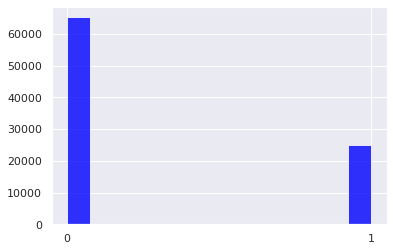

In [30]:
plt.hist(train_labelOE , 13, facecolor='blue', alpha=0.8)
plt.xticks([0,1])
plt.show()

In [31]:

model = Sequential()

model.add(Conv2D(128, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.44))

model.add(Conv2D(1024, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.44))
#mode.add(Dense(64,activation = 'relu'))
model.add(Dense(47, activation='softmax'))


# COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
model.compile(optimizer='RMSprop', loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
model.load_weights("model/model_0_V1.h5")
y_pred = np.argmax(model.predict(train_image),axis = 1)












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       409728    
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 128)       512

In [0]:
from sklearn import tree

In [0]:
clf = tree.DecisionTreeClassifier(max_depth=15)

In [70]:
train_labelOE.shape,y_pred.shape

((90240,), (90240,))

In [71]:
clf.fit(y_pred.reshape(-1,1),train_labelOE.reshape(-1,1))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_pred_D = np.argmax(model.predict(dev_image),axis = 1)

Recall: [0.96946846 0.86269803]
Precision: [0.94853338 0.91543556]

 clasification report:
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     16311
         1.0       0.92      0.86      0.89      6249

    accuracy                           0.94     22560
   macro avg       0.93      0.92      0.92     22560
weighted avg       0.94      0.94      0.94     22560


 confussion matrix:
 [[15813   498]
 [  858  5391]]


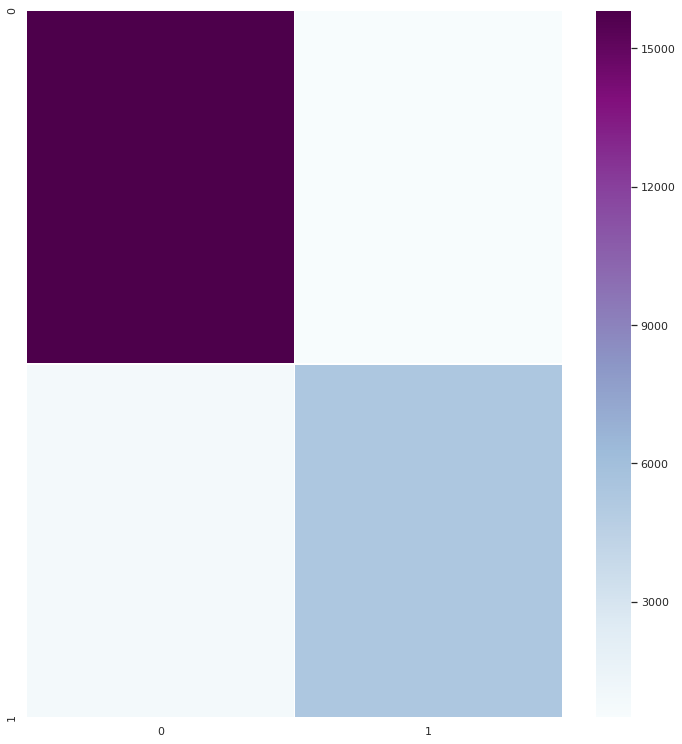

In [73]:
y = clf.predict(y_pred_D.reshape(-1,1))
acc(dev_labelOE.reshape(-1,1),y,"BuPu")

In [0]:
def predict(model,clf,test_csv):
  if type(test_csv) is str:
    test_csv = pd.read_csv(test_csv,header=None)
  test_feature, test_labels,_,_,_,_ = dataset_distribution(test_csv,[100,0,0])
  print("Shape of feature and labels are:- ",test_feature.shape, test_labels.shape)
  test_labelsLD= labelToOddeven_Vowelcharecter(test_labels)
  test_image = change_to_image(test_feature)
  test_labelenLD = one_hot_encoding(test_labels)
  y_pred_D = np.argmax(model.predict(test_image),axis = 1)
  y = clf.predict(y_pred_D.reshape(-1,1))
  acc(test_labelsLD.reshape(-1,1),y,"BuPu")
  print("Accuracy is :- ",accuracy_score(test_labelsLD.reshape(-1,1),y))
  index = np.arange(test_labels.shape[0]).reshape(-1,1)
  y = y.reshape(-1,1)
  data = pd.DataFrame(np.concatenate((index,y),axis = 1))
  data.to_csv("result_Task2.csv",index = None,header = ["index","Y"])

Shape of feature and labels are:-  (18800, 784) (18800,)
Recall: [0.96904412 0.86192308]
Precision: [0.94833417 0.9141342 ]

 clasification report:
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     13600
         1.0       0.91      0.86      0.89      5200

    accuracy                           0.94     18800
   macro avg       0.93      0.92      0.92     18800
weighted avg       0.94      0.94      0.94     18800


 confussion matrix:
 [[13179   421]
 [  718  4482]]
Accuracy is :-  0.9394148936170212


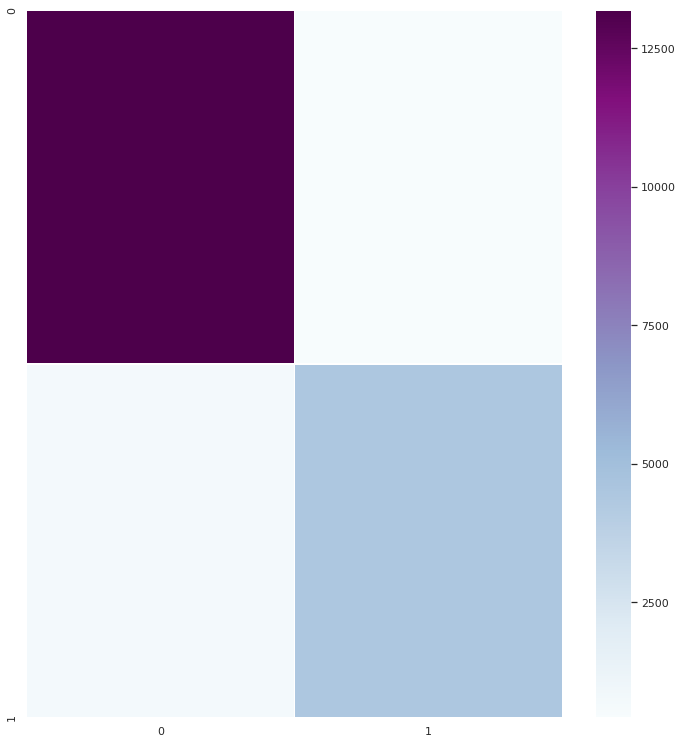

In [75]:
predict(model,clf,test_csv)

In [0]:
import pickle
with open("model/OddEvenVowelConClf.pkl","wb") as file:
  ss = pickle.dumps(clf)
  file.write(ss)

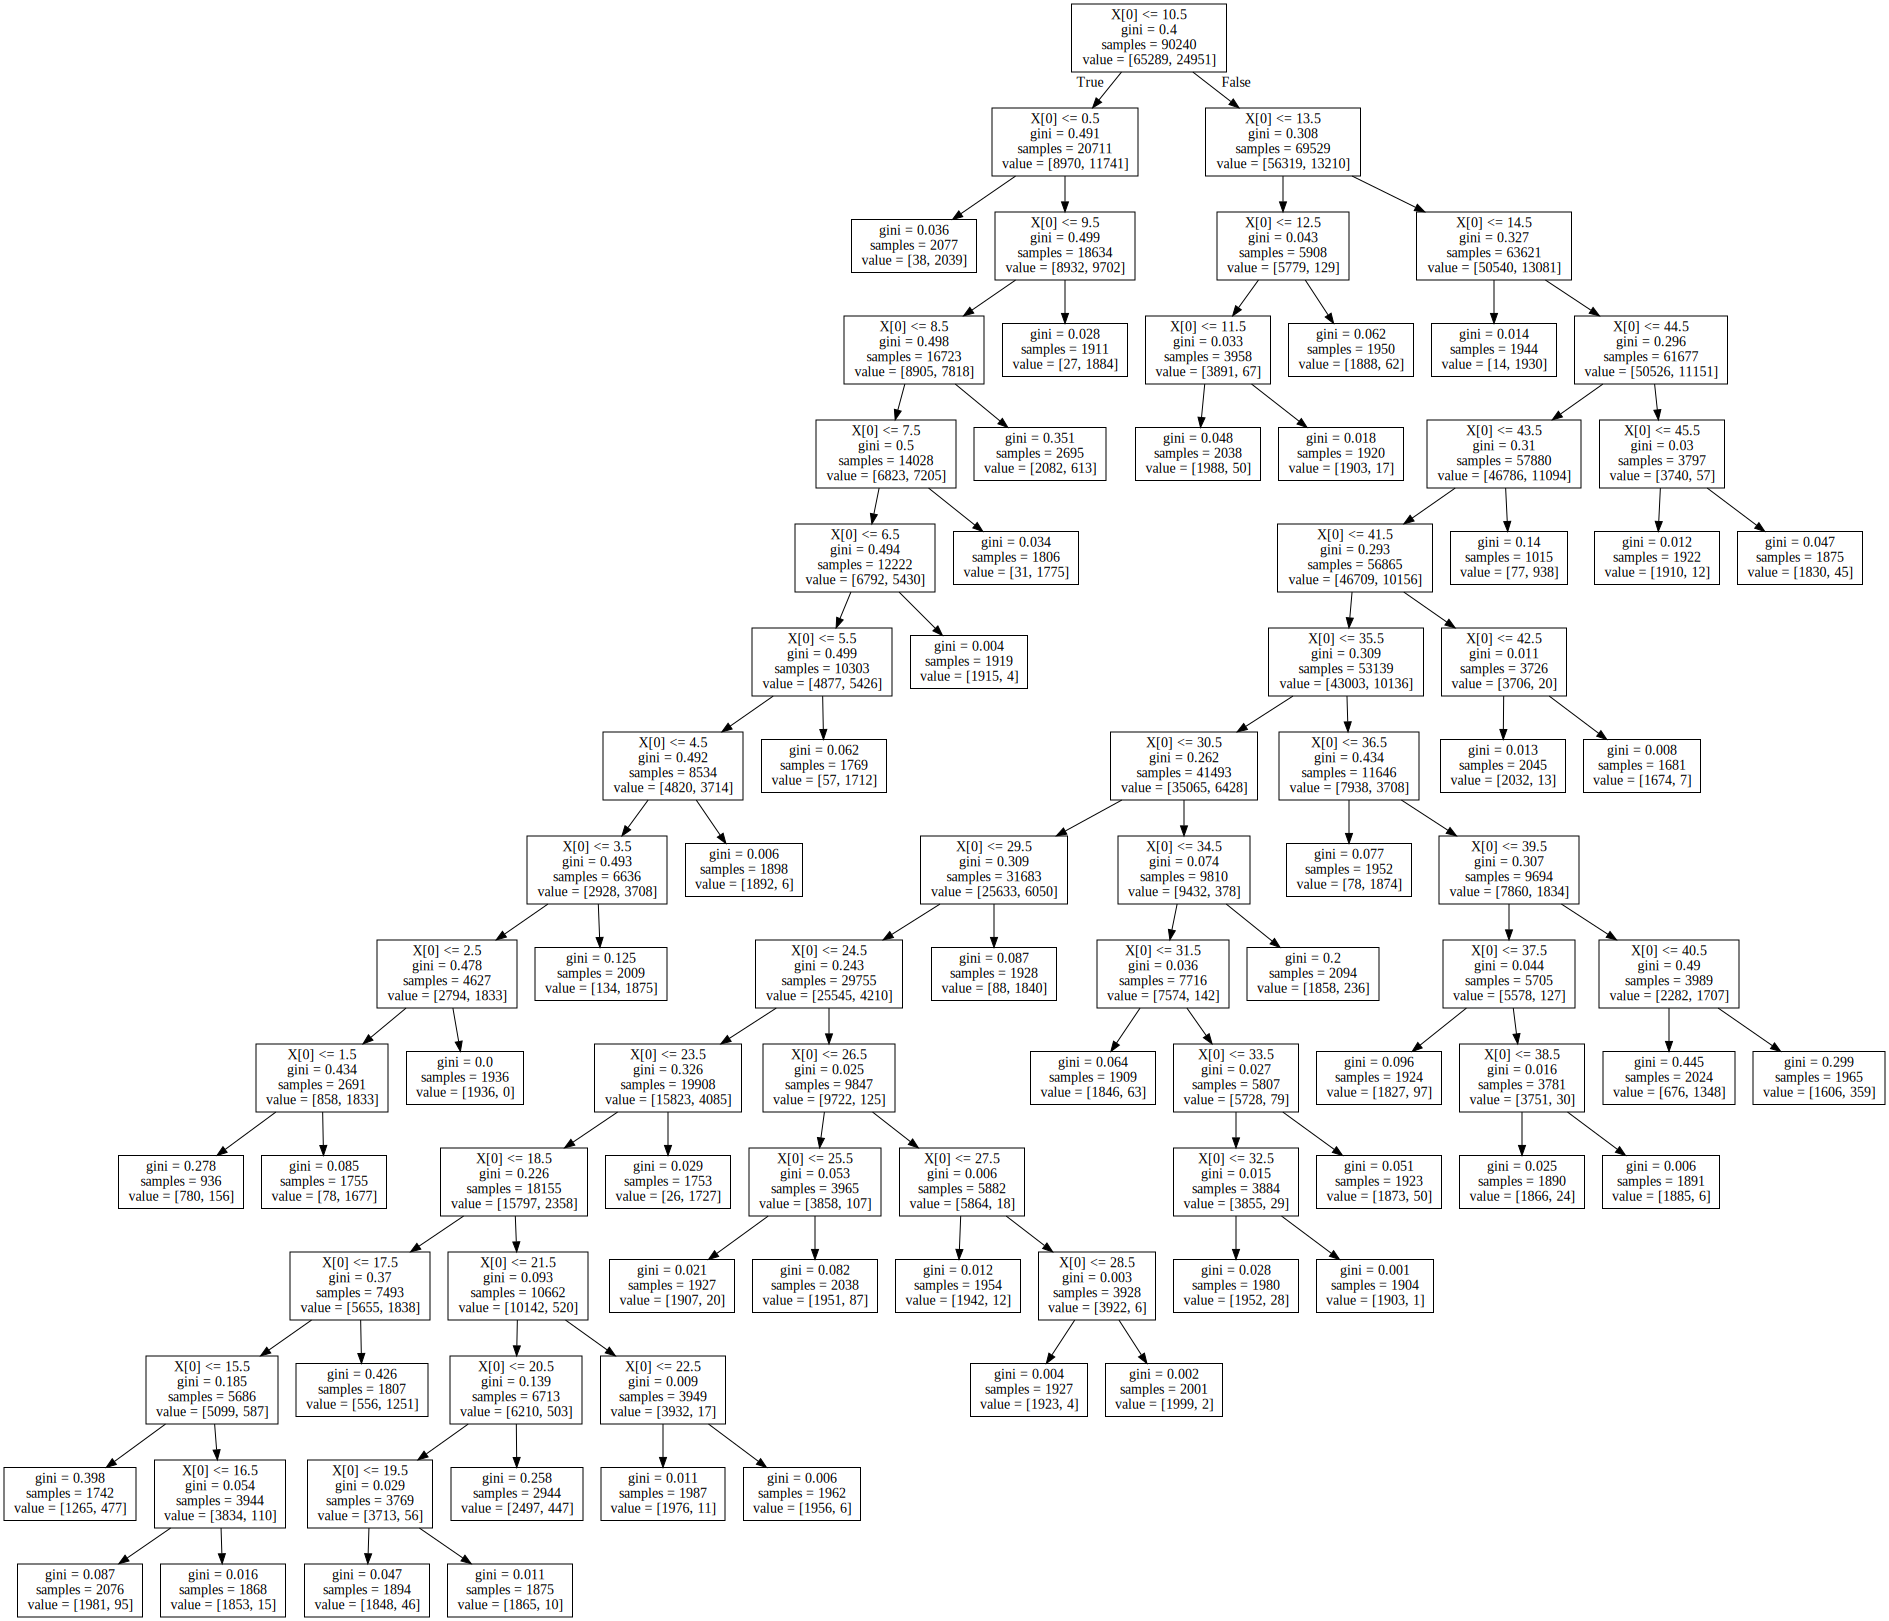

In [77]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [78]:
graph.render("clf1")

'clf1.pdf'